In [1]:
import numpy
import urllib
import scipy.optimize
import random
from math import exp
from math import log

In [2]:
def parseData(fname):
  for l in urllib.request.urlopen(fname):
    yield eval(l)

In [3]:
print ("Reading data...")
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print ("done")

Reading data...
done


In [4]:
n=len(data)
random.shuffle(data)
data_train=data[:int(n/3)]
data_test=data[int(n/3):int(n/3)*2]
data_valid=data[int(n/3)*2:]

In [5]:
def feature(datum):
  feat = [1, datum['review/taste'], datum['review/appearance'], datum['review/aroma'], datum['review/palate'], datum['review/overall']]
  return feat

In [6]:
X = [feature(d) for d in data]
y = [d['beer/ABV'] >= 6.5 for d in data]

In [7]:
def inner(x,y):
  return sum([x[i]*y[i] for i in range(len(x))])


In [8]:
def sigmoid(x):
  return 1.0 / (1 + exp(-x))

In [9]:
# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
  loglikelihood = 0
  for i in range(len(X)):
    logit = inner(X[i], theta)
    loglikelihood -= log(1 + exp(-logit))
    if not y[i]:
      loglikelihood -= logit
  for k in range(len(theta)):
    loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
  # print("ll =" + str(loglikelihood))
  return -loglikelihood

In [10]:
# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
  dl = [0]*len(theta)
  for i in range(len(X)):
    logit = inner(X[i], theta)
    for k in range(len(theta)):
      dl[k] += X[i][k] * (1 - sigmoid(logit))
      if not y[i]:
        dl[k] -= X[i][k]
  for k in range(len(theta)):
    dl[k] -= lam*2*theta[k]
  return numpy.array([-x for x in dl])

In [11]:
X_train = X
y_train = y

In [12]:
def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X, y, lam))
  return theta

In [13]:
def performance(theta):
  scores = [inner(theta,x) for x in X]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,y_train)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc

##1

train data

In [14]:
X3 = [feature(d) for d in data_train]
y3 = [d['beer/ABV'] >= 6.5 for d in data_train]
def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X3, y3, lam))
  return theta
def performance_test(theta):
  scores = [inner(theta,x) for x in X3]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,y3)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc
lam = 1.0
theta = train(lam)
acc_train = performance(theta)
print ("Training accuracy: {0:.5f}".format(acc_train))


Training accuracy: 0.71856


test data

In [15]:
X1 = [feature(d) for d in data_test]
y1 = [d['beer/ABV'] >= 6.5 for d in data_test]
def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X1, y1, lam))
  return theta
def performance_test(theta):
  scores = [inner(theta,x) for x in X1]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,y1)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc
lam = 1.0
theta = train(lam)
acc_test = performance(theta)
print ("Testing accuracy: {0:.5f}".format(acc_test))

Testing accuracy: 0.71886


valid data

In [16]:
X2 = [feature(d) for d in data_valid]
y2 = [d['beer/ABV'] >= 6.5 for d in data_valid]
def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X2, y2, lam))
  return theta
def performance_test(theta):
  scores = [inner(theta,x) for x in X2]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,y2)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc
lam = 1.0
theta = train(lam)
acc_val = performance(theta)
print ("validating accuracy: {0:.5f}".format(acc_val))

validating accuracy: 0.71858


In [17]:
##2

In [18]:
X4 = [feature(d) for d in data_test]
y4= [d['beer/ABV'] >= 6.5 for d in data_test]

In [19]:
def pn(theta):
  scores = [inner(theta,x) for x in X4]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,y4)]
  TP=[(a==1 and b==1) for (a,b) in zip(predictions,y4)]
  FP=[(a==1 and b==0) for (a,b) in zip(predictions,y4)]
  TN=[(a==0 and b==0) for (a,b) in zip(predictions,y4)]
  FN=[(a==0 and b==1) for (a,b) in zip(predictions,y4)]
  tp=sum(TP)
  fp=sum(FP)
  tn=sum(TN)
  fn=sum(FN)
  positive=tp+fp
  negative=tn+fn
  return positive,negative,tp,fp,tn,fn

In [20]:
lam=1.0
theta=train(lam)
answer=pn(theta)

In [21]:
print("positive,negative,tp,fp,tn,fn")
print(answer)

positive,negative,tp,fp,tn,fn
(12399, 4267, 8968, 3431, 2945, 1322)


In [22]:
##4

train data

In [23]:
X3 = [feature(d) for d in data_train]
y3 = [d['beer/ABV'] >= 6.5 for d in data_train]
def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X3, y3, lam))
  return theta
def performance_test(theta):
  scores = [inner(theta,x) for x in X3]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,y3)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc
for lam in [0, 0.01, 0.1, 100.0]:
    theta = train(lam)
    acc_val = performance(theta)
    print (lam,"validating accuracy: {0:.5f}".format(acc_val))

0 validating accuracy: 0.71870
0.01 validating accuracy: 0.71870
0.1 validating accuracy: 0.71852
100.0 validating accuracy: 0.66822


test data

In [24]:
X1 = [feature(d) for d in data_test]
y1 = [d['beer/ABV'] >= 6.5 for d in data_test]
def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X1, y1, lam))
  return theta
def performance_test(theta):
  scores = [inner(theta,x) for x in X1]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,y1)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc
for lam in [0, 0.01, 0.1, 100.0]:
    theta = train(lam)
    acc_test = performance(theta)
    print (lam,"Testing accuracy: {0:.5f}".format(acc_test))

0 Testing accuracy: 0.71974
0.01 Testing accuracy: 0.71974
0.1 Testing accuracy: 0.71976
100.0 Testing accuracy: 0.67308


valid data

In [25]:
X2 = [feature(d) for d in data_valid]
y2 = [d['beer/ABV'] >= 6.5 for d in data_valid]
def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X2, y2, lam))
  return theta
def performance_test(theta):
  scores = [inner(theta,x) for x in X2]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,y2)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc
for lam in [0, 0.01, 0.1, 100.0]:
    theta = train(lam)
    acc_val = performance(theta)
    print (lam,"validating accuracy: {0:.5f}".format(acc_val))

0 validating accuracy: 0.71918
0.01 validating accuracy: 0.71920
0.1 validating accuracy: 0.71884
100.0 validating accuracy: 0.67208


In [26]:
##5

In [27]:
!pip3 install --user networkx

  Using cached https://files.pythonhosted.org/packages/bc/bb/a24838832ba35baf52f32ab1a49b906b5f82fb7c76b2f6a7e35e140bac30/decorator-4.3.0-py2.py3-none-any.whl


In [28]:
import numpy
import urllib
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

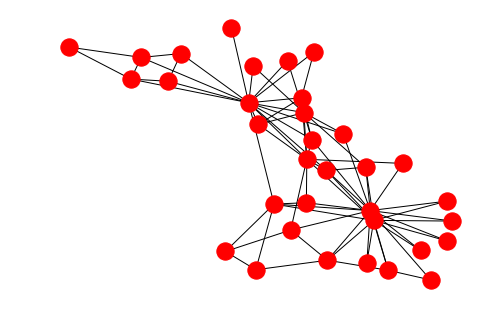

<Figure size 432x288 with 0 Axes>

In [29]:
G = nx.karate_club_graph()
nx.draw(G)
plt.show()
plt.clf()

In [30]:
edges = set()
nodes = set()
for edge in urllib.request.urlopen("http://jmcauley.ucsd.edu/cse255/data/facebook/egonet.txt"):
  x,y = edge.split()
  x,y = int(x),int(y)
  edges.add((x,y))
  edges.add((y,x))
  nodes.add(x)
  nodes.add(y)

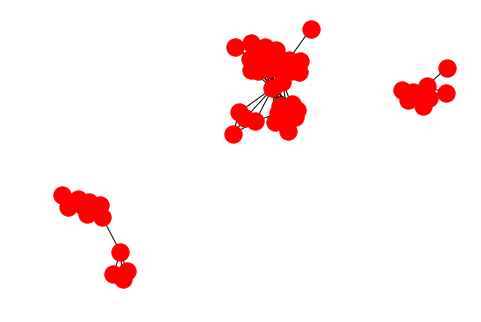

<Figure size 432x288 with 0 Axes>

In [31]:
G = nx.Graph()
for e in edges:
  G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()

There are 3 connected components are in the graph

In [32]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
print(Gc.number_of_nodes())

40


There are 40 nodes are in the largest connected component.

In [33]:
##6

In [34]:
largest = sorted(Gc.nodes())## sort
lo = largest[:20]## lowest 50 % nodes
hi = largest[20:] ## highest 50% nodes
print (nx.normalized_cut_size(Gc, lo, hi)/2)

0.4224058769513316


In [35]:
##7

In [36]:
for k in range(50):
    cut1 = []
    cut2 = []
    for i in range(len(lo)):
        a = lo[i]
        hi.append(a)
        lo.remove(a)
        temp1 = nx.normalized_cut_size(Gc, lo, hi)/2
        cut1.append((temp1, i))
        lo.append(a)
        hi.remove(a)
        lo = sorted(lo)
        #print (lo)
    for j in range(len(hi)):
        a = hi[j]
        lo.append(a)
        hi.remove(a)
        temp2 = nx.normalized_cut_size(Gc, lo, hi)/2
        cut2.append((temp2, j))
        hi.append(a)
        lo.remove(a)
        hi = sorted(hi)
    x1, i = min(cut1)
    print(min(cut1))
    x2, j = min(cut2)
    if x1 < x2:
        a = lo[i]
        hi.append(a)
        lo.remove(a)
        print(x1)
    else:
        a = hi[j]
        lo.append(a)
        hi.remove(a)
        x = x2
        print(x2)   

(0.3873319662793347, 5)
0.3873319662793347
(0.34545454545454546, 14)
0.34545454545454546
(0.3409724948854126, 13)
0.30683403068340304
(0.3003972194637537, 7)
0.26663264655227403
(0.2607738548810431, 13)
0.2257691215965414
(0.2195418257549462, 13)
0.17876489707475623
(0.17854401087934021, 7)
0.1471436149357688
(0.14732142857142858, 7)
0.12950012950012948
(0.1341966966966967, 11)
0.111295801112958
(0.1161339859871389, 11)
0.09817045961624274
(0.10366140968430389, 11)
0.10366140968430389
(0.1161339859871389, 21)
0.09817045961624274
(0.10366140968430389, 11)
0.10366140968430389
(0.1161339859871389, 21)
0.09817045961624274
(0.10366140968430389, 11)
0.10366140968430389
(0.1161339859871389, 21)
0.09817045961624274
(0.10366140968430389, 11)
0.10366140968430389
(0.1161339859871389, 21)
0.09817045961624274
(0.10366140968430389, 11)
0.10366140968430389
(0.1161339859871389, 21)
0.09817045961624274
(0.10366140968430389, 11)
0.10366140968430389
(0.1161339859871389, 21)
0.09817045961624274
(0.1036614

 The normalized cut cost is 0.09817045961624274

In [37]:
##8

In [38]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as  np
import networkx as nx

In [39]:
def mod(comm,G):
    k=2
    m=G.number_of_edges()
    edges=G.edges()
    e=np.zeros((k,k),np.float)
    for i in range(k):
        for j in range(k):
            bian=0
            for x in comm[i]:
                for y in comm[j]:
                    if x<y:
                        if (x,y) in edges:
                            bian=bian+1
                    else:
                        if (y,x) in edges:
                            bian=bian+1
            if i==j:
                bian=bian/2
            if i==j:
                e[i,j]=bian*1.0/m
            else:
                e[i,j]=bian*0.5/m
    a=np.zeros(k,np.float)
    for i in range(k):
        he=0
        for j in range(k):
            he=he+e[i,j]
        a[i]=he
    QValue=0
    for i in range(k):
        QValue=QValue+e[i,i]-a[i]*a[i]
    return QValue


In [40]:
nodes = sorted(Gc.nodes())## sort
lo = nodes[:20]## lowest 50 % nodes
hi = nodes[20:] ## highest 50% nodes
comm = [lo, hi]
v = mod([lo, hi], Gc)
for k in range(101):
    cut1 = []
    cut2 = []
    for i in range(len(lo)):
        a = lo[i]
        hi.append(a)
        lo.remove(a)
        temp1 = mod([lo, hi], Gc)
        cut1.append((temp1, i))
        lo.append(a)
        hi.remove(a)
        lo = sorted(lo)
        #print (lo)
    for j in range(len(hi)):
        a = hi[j]
        lo.append(a)
        hi.remove(a)
        temp2 = mod([lo, hi], Gc)
        cut2.append((temp2, j))
        hi.append(a)
        lo.remove(a)
        hi = sorted(hi)
    x1, i = max(cut1)
    x2, j = max(cut2)
    if x1 > x2:
        a = lo[i]
        hi.append(a)
        lo.remove(a)
        #print(x1)
        ans = x1
    else:
        a = hi[j]
        lo.append(a)
        hi.remove(a)
        x = x2
        #print(x2) 
        ans = x2

print (ans)


0.33801652892561984


In [41]:
print(lo)
print(hi)

[697, 703, 708, 713, 719, 745, 747, 772, 774, 800, 803, 805, 810, 819, 823, 828, 830, 840, 880]
[729, 753, 769, 804, 811, 825, 856, 861, 863, 864, 869, 876, 878, 882, 884, 886, 888, 889, 890, 893, 798]


 modularity values is 0.33801652892561984